# MML project/tesina code

## 1) Introduction

### Parameters to configure the code:

In [1]:
perform_pca = True
perform_oversampling = False
perform_grid_search = False
perform_binary = False

### 1.a) Import dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV # not used yet
from sklearn.model_selection import RandomizedSearchCV # not used yet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score # not used yet
from sklearn.metrics import classification_report # not used yet
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier # not used yet
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB # not used yet
from sklearn.neighbors import KNeighborsClassifier # not used yet
from sklearn.svm import SVC # not used yet
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV


### 1.b) General data exploration

In [3]:
df = pd.read_csv('dataset_diabetes/diabetic_data.csv')

d:\hdd\lab04_rev\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

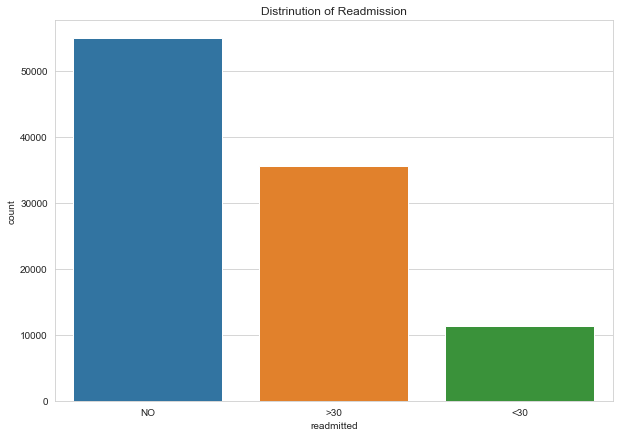

In [4]:
# Target variable distribution before data cleaning
fig = plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
ax = sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')
fig.savefig("images/class_distribution_pre_cleaning.png") 
df['readmitted'].value_counts()

In [5]:
vals = df['readmitted'].value_counts()
s = set(vals)
tot = sum(s)
res = vals / tot
res*100

NO     53.911916
>30    34.928169
<30    11.159916
Name: readmitted, dtype: float64

In [6]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
print('Dataset dimensions:')
df.shape

Dataset dimensions:


(101766, 50)

In [8]:
encounters = set(df['encounter_id'].values)
patients = set(df['patient_nbr'].values)
print(f'df records:{len(df)}\nset of encounter_id: {len(encounters)}\nset of different patients: {len(patients)}')
duplicates = df.duplicated()
print('\nAre there dupliate rows (complete, considering all the attributes)?')
duplicates.value_counts()

# No duplicated values, however there can exist more records for the same patient

df records:101766
set of encounter_id: 101766
set of different patients: 71518

Are there dupliate rows (complete, considering all the attributes)?


False    101766
dtype: int64

In [9]:
# dataset attributes' datatypes
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
cols = df.columns

print(cols)
for c in cols:
    if c != 'encounter_id' and c != 'patient_nbr':
        print(c)
        v = set(df[c].values)
        print(v, '\n')

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
race
{'Hispanic', 'Other', 'Caucasian', 'AfricanAmerican', 'Asian', '

In [11]:
values = set(df['readmitted'].values)
print('target variables:',values)
# so 3 class classification
# also binary classification can be useful

target variables: {'>30', '<30', 'NO'}


In [12]:
# Missing values represented by "?" character
# Counting missing values
print('MISSING VALUES COUNT\n')
print('Attr. name, n_missing, %missing\n')
for col in df.columns:
    if df[col].dtype == object:
        n_missing = df[col][df[col] == '?'].count()
        print(col,'\t', n_missing,'\t', n_missing/len(df)*100,'%')
        
# weight 97% missing values
# payer_code and medical speciality ---> High percentage of missing values
# so we drop the attributes columns

# for diag_1, diag_2 and diag_3 we drop only the indexes where a missing 
# value is present among these attributes 

MISSING VALUES COUNT

Attr. name, n_missing, %missing

race 	 2273 	 2.2335554114340743 %
gender 	 0 	 0.0 %
age 	 0 	 0.0 %
weight 	 98569 	 96.85847925633315 %
payer_code 	 40256 	 39.5574160328597 %
medical_specialty 	 49949 	 49.08220820313268 %
diag_1 	 21 	 0.02063557573256294 %
diag_2 	 358 	 0.3517874339170253 %
diag_3 	 1423 	 1.398305917497003 %
max_glu_serum 	 0 	 0.0 %
A1Cresult 	 0 	 0.0 %
metformin 	 0 	 0.0 %
repaglinide 	 0 	 0.0 %
nateglinide 	 0 	 0.0 %
chlorpropamide 	 0 	 0.0 %
glimepiride 	 0 	 0.0 %
acetohexamide 	 0 	 0.0 %
glipizide 	 0 	 0.0 %
glyburide 	 0 	 0.0 %
tolbutamide 	 0 	 0.0 %
pioglitazone 	 0 	 0.0 %
rosiglitazone 	 0 	 0.0 %
acarbose 	 0 	 0.0 %
miglitol 	 0 	 0.0 %
troglitazone 	 0 	 0.0 %
tolazamide 	 0 	 0.0 %
examide 	 0 	 0.0 %
citoglipton 	 0 	 0.0 %
insulin 	 0 	 0.0 %
glyburide-metformin 	 0 	 0.0 %
glipizide-metformin 	 0 	 0.0 %
glimepiride-pioglitazone 	 0 	 0.0 %
metformin-rosiglitazone 	 0 	 0.0 %
metformin-pioglitazone 	 0 	 0.0 %
ch

## 2) Pre-processing

### 2.a) Missing values and feature removal

In [13]:
df['patient_nbr'].value_counts()

88785891    40
43140906    28
88227540    23
1660293     23
23199021    23
            ..
66733983     1
20299680     1
112545       1
55422882     1
35488413     1
Name: patient_nbr, Length: 71518, dtype: int64

In [14]:
df = df.drop_duplicates(subset=['patient_nbr'], keep = 'first')

In [15]:
df['patient_nbr'].value_counts()

85331970     1
6157332      1
56339487     1
2432565      1
91200537     1
            ..
50921172     1
64490004     1
100143639    1
94923288     1
35488413     1
Name: patient_nbr, Length: 71518, dtype: int64

In [16]:
# Missing values represented by "?" character
# Counting missing values
print('MISSING VALUES COUNT\n')
print('Attr. name, n_missing, %missing\n')
for col in df.columns:
    if df[col].dtype == object:
        n_missing = df[col][df[col] == '?'].count()
        print(col,'\t', n_missing,'\t', n_missing/len(df)*100,'%')
        
# weight 97% missing values
# payer_code and medical speciality ---> High percentage of missing values
# so we drop the attributes columns

# for diag_1, diag_2 and diag_3 we drop only the indexes where a missing 
# value is present among these attributes 

MISSING VALUES COUNT

Attr. name, n_missing, %missing

race 	 1948 	 2.7237898151514304 %
gender 	 0 	 0.0 %
age 	 0 	 0.0 %
weight 	 68665 	 96.0107944853044 %
payer_code 	 31043 	 43.4058558684527 %
medical_specialty 	 34477 	 48.20744427976174 %
diag_1 	 11 	 0.01538074330937666 %
diag_2 	 294 	 0.41108532117788527 %
diag_3 	 1225 	 1.7128555049078553 %
max_glu_serum 	 0 	 0.0 %
A1Cresult 	 0 	 0.0 %
metformin 	 0 	 0.0 %
repaglinide 	 0 	 0.0 %
nateglinide 	 0 	 0.0 %
chlorpropamide 	 0 	 0.0 %
glimepiride 	 0 	 0.0 %
acetohexamide 	 0 	 0.0 %
glipizide 	 0 	 0.0 %
glyburide 	 0 	 0.0 %
tolbutamide 	 0 	 0.0 %
pioglitazone 	 0 	 0.0 %
rosiglitazone 	 0 	 0.0 %
acarbose 	 0 	 0.0 %
miglitol 	 0 	 0.0 %
troglitazone 	 0 	 0.0 %
tolazamide 	 0 	 0.0 %
examide 	 0 	 0.0 %
citoglipton 	 0 	 0.0 %
insulin 	 0 	 0.0 %
glyburide-metformin 	 0 	 0.0 %
glipizide-metformin 	 0 	 0.0 %
glimepiride-pioglitazone 	 0 	 0.0 %
metformin-rosiglitazone 	 0 	 0.0 %
metformin-pioglitazone 	 0 	 0.0 %
c

In [17]:
# There exist a record with no diagnosis
df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
87181,277875756,6734736,Asian,Male,[60-70),?,2,13,4,7,...,No,No,No,No,No,No,No,No,No,NO


In [18]:
idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
df.drop(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index, inplace = True)
df.shape

(71517, 50)

In [19]:
features_drop_list = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty', 'repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'acetohexamide', 'tolbutamide']
df.drop(features_drop_list, axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      71517 non-null  object
 1   gender                    71517 non-null  object
 2   age                       71517 non-null  object
 3   admission_type_id         71517 non-null  int64 
 4   discharge_disposition_id  71517 non-null  int64 
 5   admission_source_id       71517 non-null  int64 
 6   time_in_hospital          71517 non-null  int64 
 7   num_lab_procedures        71517 non-null  int64 
 8   num_procedures            71517 non-null  int64 
 9   num_medications           71517 non-null  int64 
 10  number_outpatient         71517 non-null  int64 
 11  number_emergency          71517 non-null  int64 
 12  number_inpatient          71517 non-null  int64 
 13  diag_1                    71517 non-null  object
 14  diag_2               

In [20]:
#start by setting all values containing E or V into 0 (as one category)
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

#setting all missing values into -1
df['diag_1'] = df['diag_1'].replace('?', -1)
df['diag_2'] = df['diag_2'].replace('?', -1)
df['diag_3'] = df['diag_3'].replace('?', -1)

#No all diag values can be converted into numeric values
df['diag_1'] = df['diag_1'].astype('float16')
df['diag_2'] = df['diag_2'].astype('float16')
df['diag_3'] = df['diag_3'].astype('float16')

#Now we will reduce the number of categories in diag features according to ICD-9 code
#(Missing values will be grouped as E & V values)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17
df['diag_1'].loc[(df['diag_1']==-1)] = 0

df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17
df['diag_2'].loc[(df['diag_2']==-1)] = 0

df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17
df['diag_3'].loc[(df['diag_3']==-1)] = 0

d:\hdd\lab04_rev\venv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
d:\hdd\lab04_rev\venv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
d:\hdd\lab04_rev\venv\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [21]:
df['race'] = df['race'].replace('?', 'Other')

In [22]:
df['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                496
Name: race, dtype: int64

In [23]:
df['gender'].value_counts()

Female             38025
Male               33489
Unknown/Invalid        3
Name: gender, dtype: int64

In [24]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71517 non-null  object 
 1   gender                    71517 non-null  object 
 2   age                       71517 non-null  object 
 3   admission_type_id         71517 non-null  int64  
 4   discharge_disposition_id  71517 non-null  int64  
 5   admission_source_id       71517 non-null  int64  
 6   time_in_hospital          71517 non-null  int64  
 7   num_lab_procedures        71517 non-null  int64  
 8   num_procedures            71517 non-null  int64  
 9   num_medications           71517 non-null  int64  
 10  number_outpatient         71517 non-null  int64  
 11  number_emergency          71517 non-null  int64  
 12  number_inpatient          71517 non-null  int64  
 13  diag_1                    71517 non-null  float16
 14  diag_

### 2.b) Duplicate values

In [26]:
print('***Missing values after cleaning***\n')
for col in df.columns:
    if df[col].dtype == object:
        n_missing = df[col][df[col] == '?'].count()
        print(col,'\t', n_missing,'\t', n_missing/len(df)*100,'%')
        

***Missing values after cleaning***

race 	 0 	 0.0 %
gender 	 0 	 0.0 %
age 	 0 	 0.0 %
max_glu_serum 	 0 	 0.0 %
A1Cresult 	 0 	 0.0 %
metformin 	 0 	 0.0 %
glimepiride 	 0 	 0.0 %
glipizide 	 0 	 0.0 %
glyburide 	 0 	 0.0 %
pioglitazone 	 0 	 0.0 %
rosiglitazone 	 0 	 0.0 %
insulin 	 0 	 0.0 %
change 	 0 	 0.0 %
diabetesMed 	 0 	 0.0 %
readmitted 	 0 	 0.0 %


### 2.c) dataset visualization

In [27]:
vals =df['readmitted'].value_counts()
s = set(vals)
s
tot = sum(s)
tot

71517

d:\hdd\lab04_rev\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


NO     42984
>30    22240
<30     6293
Name: readmitted, dtype: int64

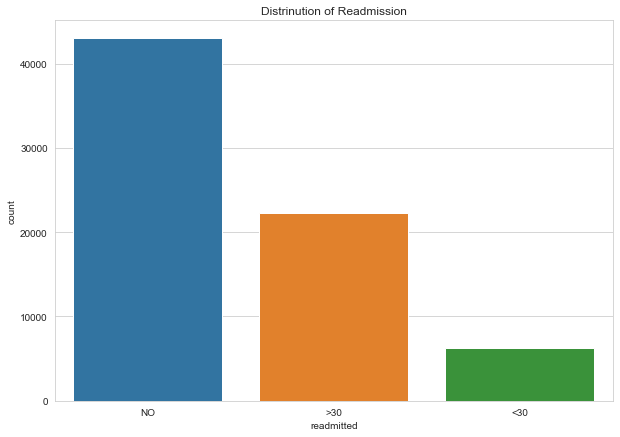

In [28]:
# Target variable distribution
fig = plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
ax = sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')
fig.savefig("images/class_distribution.png") 
df['readmitted'].value_counts()

Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

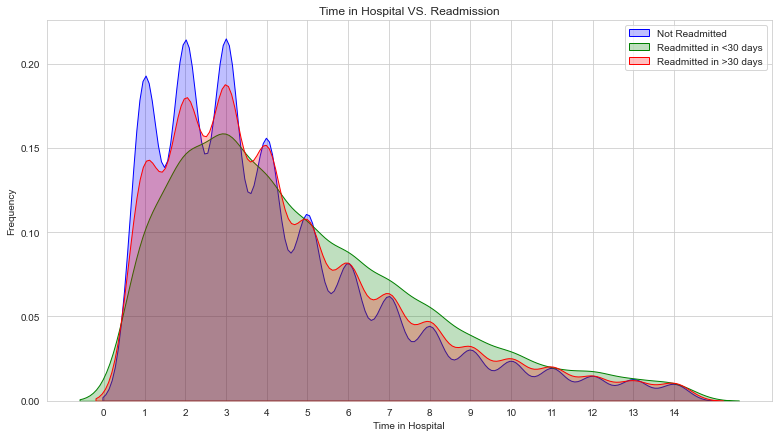

In [29]:
fig = plt.figure(figsize=(13,7))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'time_in_hospital'] , color='g',shade=True, label='Readmitted in <30 days')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '>30'),'time_in_hospital'] , color='r',shade=True, label='Readmitted in >30 days')
minor_ticks = np.arange(0, 15, 1)
ax.set_xticks(minor_ticks)
ax.legend()
fig.savefig("images/time_distribution.png") 
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')



Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

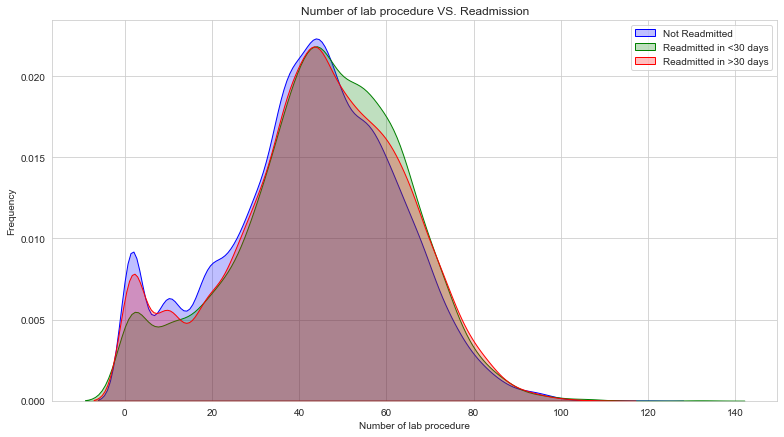

In [30]:
fig = plt.figure(figsize=(13,7))
ax=sns.kdeplot(df.loc[(df['readmitted'] == 'NO'),'num_lab_procedures'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '<30'),'num_lab_procedures'] , color='g',shade=True, label='Readmitted in <30 days')
ax=sns.kdeplot(df.loc[(df['readmitted'] == '>30'),'num_lab_procedures'] , color='r',shade=True, label='Readmitted in >30 days')
minor_ticks = np.arange(0, 160, 20)
ax.set_xticks(minor_ticks)
ax.legend()
fig.savefig("images/num_lab_procedures_distribution.png") 
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

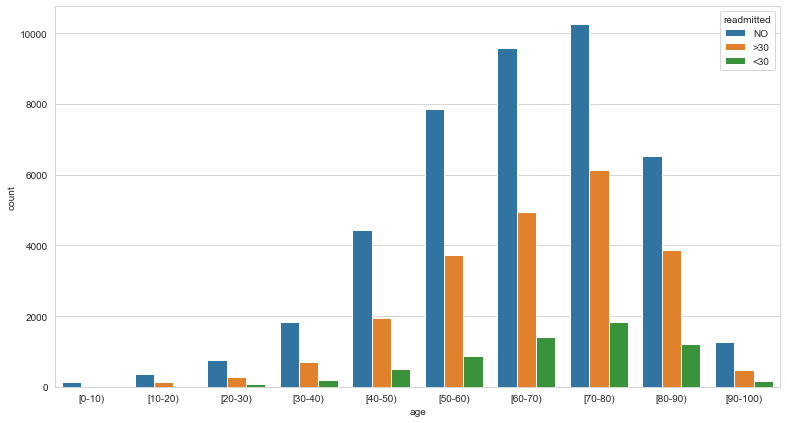

In [31]:
fig = plt.figure(figsize=(13, 7))
sns.set_style("whitegrid")
sns.countplot(x= df['age'], hue = df['readmitted'])
fig.savefig("images/age_distribution.png") 

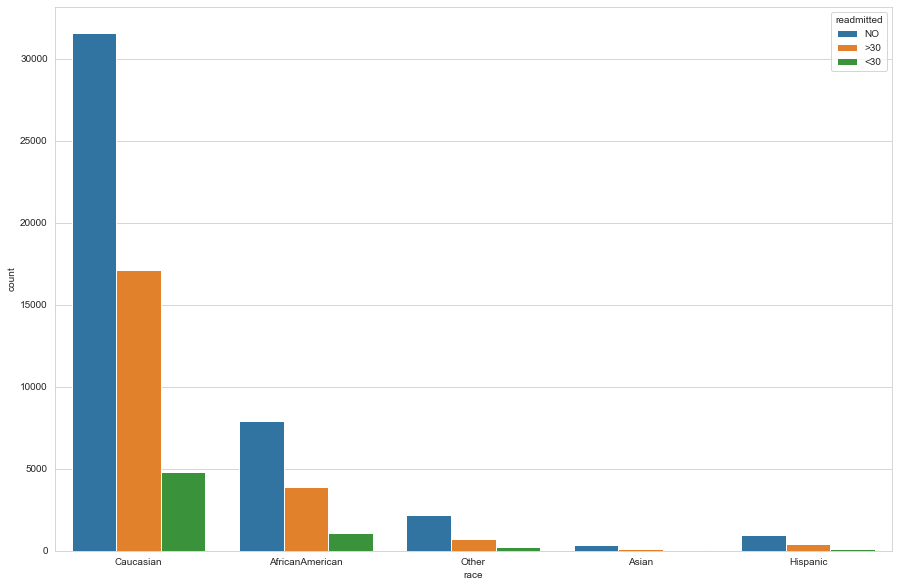

In [32]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x = df['race'], hue = df['readmitted'])
fig.savefig("images/race_distribution.png") 


In [33]:
attributes = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1','diag_2', 'diag_3', 'readmitted']

df_grid_plot = df[attributes]

In [34]:
df_grid_plot


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,readmitted
0,1,41,0,1,3.0,0.0,0.0,NO
1,3,59,0,18,3.0,3.0,3.0,>30
2,2,11,5,13,11.0,3.0,0.0,NO
3,2,44,1,16,1.0,3.0,7.0,NO
4,1,51,0,8,2.0,2.0,3.0,NO
...,...,...,...,...,...,...,...,...
101754,9,50,2,33,9.0,9.0,3.0,>30
101755,14,73,6,26,10.0,10.0,8.0,>30
101756,2,46,6,17,17.0,10.0,7.0,>30
101758,5,76,1,22,5.0,1.0,5.0,NO


In [35]:
# fig = plt.figure(figsize=(16,16))
# ax = sns.PairGrid(df_grid_plot, hue="readmitted")
# ax.map_diag(sns.kdeplot)
# ax.map_offdiag(sns.scatterplot)
# fig.savefig("images/grid_plot.png") 
# ax.add_legend()

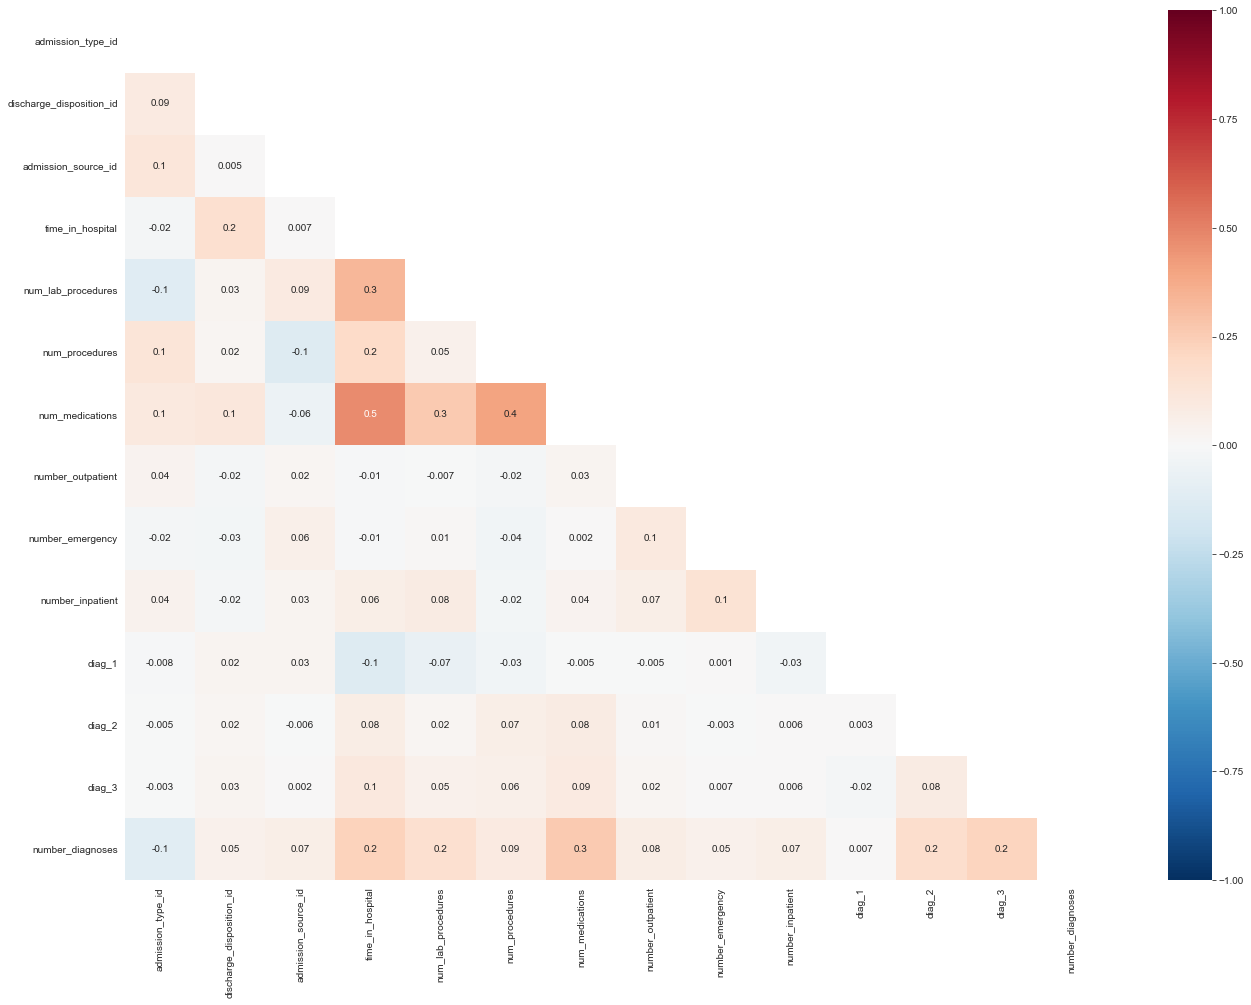

In [36]:
matrix = np.triu(df.corr(method='pearson'))
fig, ax = plt.subplots(figsize=(22,16))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
fig.savefig("images/correlation.png") 

plt.show()


## 3) Feature engineering

In [37]:
df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

### 3.a) combining features

In [38]:
# number of inpatient, outpatient and emergency represent the amount of times a patient has
# used the service (inpatient: ricovero, outpatient: ambulatorio, emergency: emergenza)
df['service_utilization'] = df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']
df.drop(['number_outpatient','number_emergency','number_inpatient'], axis=1, inplace = True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71517 non-null  object 
 1   gender                    71517 non-null  object 
 2   age                       71517 non-null  object 
 3   admission_type_id         71517 non-null  int64  
 4   discharge_disposition_id  71517 non-null  int64  
 5   admission_source_id       71517 non-null  int64  
 6   time_in_hospital          71517 non-null  int64  
 7   num_lab_procedures        71517 non-null  int64  
 8   num_procedures            71517 non-null  int64  
 9   num_medications           71517 non-null  int64  
 10  diag_1                    71517 non-null  float16
 11  diag_2                    71517 non-null  float16
 12  diag_3                    71517 non-null  float16
 13  number_diagnoses          71517 non-null  int64  
 14  max_g

In [40]:
# number of medication changes

# TODO: Motivation, help for tesina


# for col in keys:
#     colname = str(col) + 'temp'
#     df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
# df['numchange'] = 0
# for col in keys:
#     colname = str(col) + 'temp'
#     df['numchange'] = df['numchange'] + df[colname]
#     del df[colname]
    
# df['numchange'].value_counts()  

In [41]:
## Feature 

### 3.b) Features encoding

#### 3.b.i) Gender

In [42]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

#### 3.b.ii) Change in medications

In [43]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)

#### 3.b.iii) Diabetes medications

In [44]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

In [45]:
# map the remaining medications
keys = ['glyburide', 'pioglitazone', 'metformin', 'glimepiride', 'glipizide', 'rosiglitazone', 'insulin']
# encoding all medications
for col in keys:
    df[col] = df[col].replace('No', 0)
    df[col] = df[col].replace('Steady', 2)
    df[col] = df[col].replace('Up', 3)
    df[col] = df[col].replace('Down', 1)

#### 3.b.iv) A1C test results

In [46]:
# A1C is the avg blood glucose
# A1C of 7 per cent is definitely worthwhile for persons with type 1 diabetes
# A1C of 7 per cent is definitely worthwhile for persons with type 2 diabetes
# type 1 diabetes: condition that often shows up early in life (correlation with age???)
# type 2 diabetes: condition that often shows up in adults, but also childrens (correlation with age???)
# type 1 is more aggressive (check again)

# df['A1Cresult'] = df['A1Cresult'].replace('>7', 1)
# df['A1Cresult'] = df['A1Cresult'].replace('>8', 1)
# df['A1Cresult'] = df['A1Cresult'].replace('Norm', 0)
# df['A1Cresult'] = df['A1Cresult'].replace('None', -99)

df['A1Cresult'] = df['A1Cresult'].replace('>7', 2)
df['A1Cresult'] = df['A1Cresult'].replace('>8', 3)
df['A1Cresult'] = df['A1Cresult'].replace('Norm', 1)
df['A1Cresult'] = df['A1Cresult'].replace('None', 0)

#### 3.b.v) maximum glucosium serum test

In [47]:
# None means that the test has not been taken
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 2)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 3)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('None', 0)

#### 3.b.vi) Age


In [48]:
# we transform each bucket from [0-10) up to [90-100) into integers from 1 to 10
for i in range(0,10):
    df['age'] = df['age'].replace('['+str(10*i)+'-'+str(10*(i+1))+')', 10*i+5)
df['age'].value_counts()

75    18210
65    15959
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: age, dtype: int64

#### 3.b.vii) Diagnosis (first, second and third)


In [49]:
df.diag_1.unique()

array([ 3., 11.,  1.,  2.,  7.,  8., 17., 12., 13.,  9.,  0., 16., 10.,
        5.,  6.,  4., 14.], dtype=float16)

#### 3.b.viii) Readmitted (target)


In [50]:
if perform_binary == True:
    df['readmitted'] = df['readmitted'].replace('NO', 0)
    df['readmitted'] = df['readmitted'].replace('>30', 1)
    df['readmitted'] = df['readmitted'].replace('<30', 1)

else:
    df['readmitted'] = df['readmitted'].replace('NO', 0)
    df['readmitted'] = df['readmitted'].replace('>30', 1)
    df['readmitted'] = df['readmitted'].replace('<30', 2)

In [51]:
df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,6,1,1,1,1
discharge_disposition_id,25,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [52]:
df['readmitted'].value_counts()

0    42984
1    22240
2     6293
Name: readmitted, dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101765
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71517 non-null  object 
 1   gender                    71517 non-null  int64  
 2   age                       71517 non-null  int64  
 3   admission_type_id         71517 non-null  int64  
 4   discharge_disposition_id  71517 non-null  int64  
 5   admission_source_id       71517 non-null  int64  
 6   time_in_hospital          71517 non-null  int64  
 7   num_lab_procedures        71517 non-null  int64  
 8   num_procedures            71517 non-null  int64  
 9   num_medications           71517 non-null  int64  
 10  diag_1                    71517 non-null  float16
 11  diag_2                    71517 non-null  float16
 12  diag_3                    71517 non-null  float16
 13  number_diagnoses          71517 non-null  int64  
 14  max_g

#### 3.b.ix) Race encoding

In [54]:
df['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                496
Name: race, dtype: int64

In [55]:
df['race'] = df['race'].replace('Caucasian', 0)
df['race'] = df['race'].replace('AfricanAmerican', 1)
df['race'] = df['race'].replace('Hispanic', 2)
df['race'] = df['race'].replace('Asian', 3)
df['race'] = df['race'].replace('Other', 4)

In [56]:
# df = pd.concat([df,pd.get_dummies(df['race'], prefix='race')], axis=1).drop(['race'],axis=1)
# df.info()
df.race.value_counts()


0    53491
1    12887
4     3126
2     1517
3      496
Name: race, dtype: int64

In [57]:
df['severity'] = 1/(df['time_in_hospital']+df['num_procedures']+df['num_medications']+df['num_lab_procedures']+df['number_diagnoses'])
df.drop(['time_in_hospital','num_procedures','num_medications','num_lab_procedures','number_diagnoses'], axis = 1, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71517 entries, 0 to 101765
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71517 non-null  int64  
 1   gender                    71517 non-null  int64  
 2   age                       71517 non-null  int64  
 3   admission_type_id         71517 non-null  int64  
 4   discharge_disposition_id  71517 non-null  int64  
 5   admission_source_id       71517 non-null  int64  
 6   diag_1                    71517 non-null  float16
 7   diag_2                    71517 non-null  float16
 8   diag_3                    71517 non-null  float16
 9   max_glu_serum             71517 non-null  int64  
 10  A1Cresult                 71517 non-null  int64  
 11  metformin                 71517 non-null  int64  
 12  glimepiride               71517 non-null  int64  
 13  glipizide                 71517 non-null  int64  
 14  glybu

#### 3.b.final) Outlier detection

In [59]:
is_f = IsolationForest(n_estimators=50, max_samples='auto')
is_f.fit(df)

IsolationForest(n_estimators=50)

In [60]:
df['anomaly_score']=is_f.decision_function(df)
df_no_anomaly_score = df.drop(['anomaly_score'], axis = 1)
df['anomaly']=is_f.predict(df_no_anomaly_score)
df.head(20)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,service_utilization,severity,anomaly_score,anomaly
0,0,0,5,6,25,1,3.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0.022727,-0.015100,-1
1,0,0,15,1,1,7,3.0,3.0,3.0,0,...,0,0,3,1,1,1,0,0.011236,0.056481,1
2,1,0,25,1,1,7,11.0,3.0,0.0,0,...,0,0,0,0,1,0,3,0.027027,0.010471,1
3,0,1,35,1,1,7,1.0,3.0,7.0,0,...,0,0,3,1,1,0,0,0.014286,0.064020,1
4,0,1,45,1,1,7,2.0,2.0,3.0,0,...,0,0,2,1,1,0,0,0.015385,0.059126,1
5,0,1,55,2,1,2,7.0,7.0,3.0,0,...,0,0,2,0,1,1,0,0.015385,0.107179,1
6,0,1,65,3,1,2,7.0,7.0,0.0,0,...,0,0,2,1,1,0,0,0.009709,0.007902,1
7,0,1,75,1,1,7,7.0,8.0,3.0,0,...,0,0,0,0,1,1,0,0.010204,0.075574,1
8,0,0,85,2,1,4,7.0,7.0,1.0,0,...,0,0,2,1,1,0,0,0.008403,0.079121,1
9,0,0,95,3,3,4,7.0,2.0,8.0,0,...,0,2,2,1,1,0,0,0.013514,0.044710,1


In [61]:
print(f'Initial df shape:{df.shape}')
print(f'Removing {df[df.anomaly < 0 ].shape[0]} records resulted as outliers')

df = df.drop(df[df.anomaly < 0 ].index)
print(f'Final df shape after outlier detection:{df.shape}')

# df[df['anomaly'] <0 ]

Initial df shape:(71517, 25)
Removing 9984 records resulted as outliers
Final df shape after outlier detection:(61533, 25)


In [62]:
df.drop(['anomaly_score', 'anomaly'], axis = 1, inplace = True)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,service_utilization,severity
1,0,0,15,1,1,7,3.0,3.0,3.0,0,...,0,0,0,0,3,1,1,1,0,0.011236
2,1,0,25,1,1,7,11.0,3.0,0.0,0,...,2,0,0,0,0,0,1,0,3,0.027027
3,0,1,35,1,1,7,1.0,3.0,7.0,0,...,0,0,0,0,3,1,1,0,0,0.014286
4,0,1,45,1,1,7,2.0,2.0,3.0,0,...,2,0,0,0,2,1,1,0,0,0.015385
5,0,1,55,2,1,2,7.0,7.0,3.0,0,...,0,0,0,0,2,0,1,1,0,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101753,4,1,45,1,1,7,3.0,13.0,13.0,0,...,0,0,0,0,1,1,1,0,0,0.011364
101754,0,0,75,1,1,7,9.0,9.0,3.0,0,...,0,3,0,0,2,1,1,1,0,0.009709
101756,4,0,65,1,1,7,17.0,10.0,7.0,0,...,0,0,0,0,2,0,1,1,3,0.012500
101758,0,0,85,1,1,7,5.0,1.0,5.0,0,...,0,0,0,0,3,1,1,0,1,0.008850


d:\hdd\lab04_rev\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    37749
1    19034
2     4750
Name: readmitted, dtype: int64

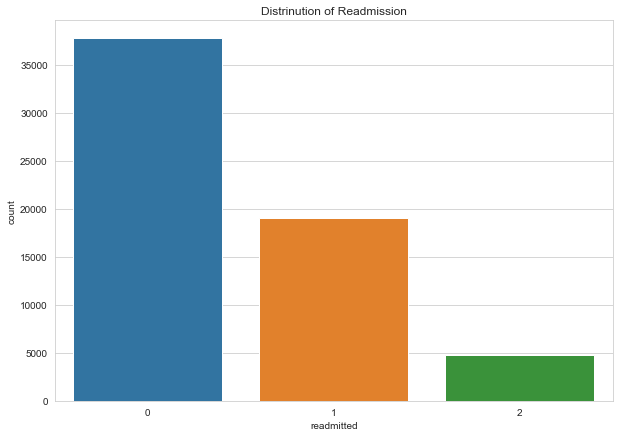

In [63]:
# Target variable distribution after cleaning
fig = plt.figure(figsize=(10,7))
sns.set_style("whitegrid")
ax = sns.countplot(df['readmitted']).set_title('Distrinution of Readmission')
fig.savefig("images/class_distribution.png") 
df['readmitted'].value_counts()

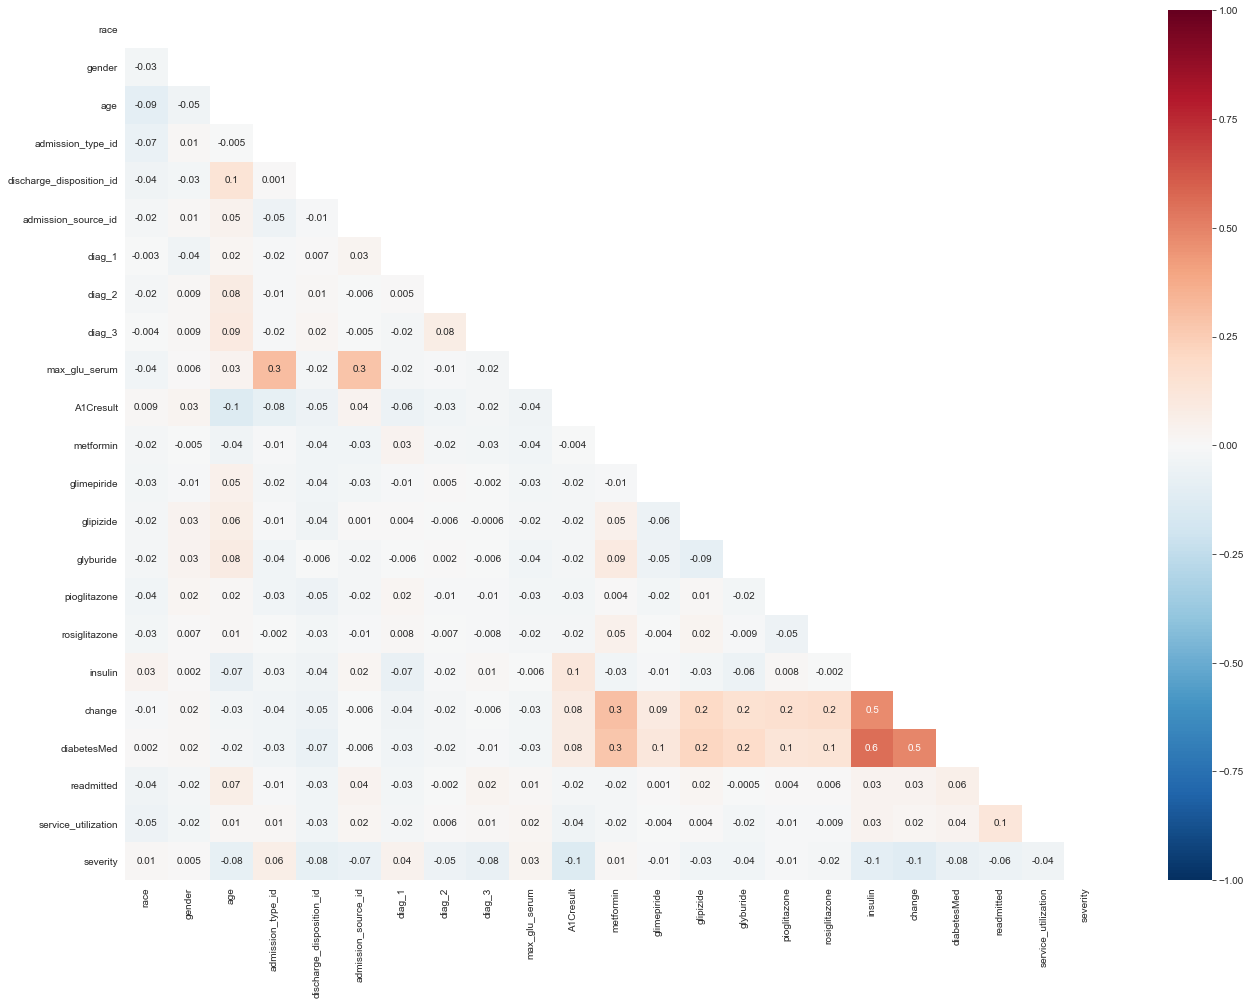

In [64]:
# prova di final correlation matrix
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(22,16))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()


In [65]:
df.drop(['insulin'], axis = 1, inplace = True)

In [66]:
df.drop(['change'], axis = 1, inplace = True)

## 4) Models


In [67]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,diabetesMed,readmitted,service_utilization,severity
1,0,0,15,1,1,7,3.0,3.0,3.0,0,...,0,0,0,0,0,0,1,1,0,0.011236
2,1,0,25,1,1,7,11.0,3.0,0.0,0,...,0,0,2,0,0,0,1,0,3,0.027027
3,0,1,35,1,1,7,1.0,3.0,7.0,0,...,0,0,0,0,0,0,1,0,0,0.014286
4,0,1,45,1,1,7,2.0,2.0,3.0,0,...,0,0,2,0,0,0,1,0,0,0.015385
5,0,1,55,2,1,2,7.0,7.0,3.0,0,...,0,0,0,0,0,0,1,1,0,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101753,4,1,45,1,1,7,3.0,13.0,13.0,0,...,2,0,0,0,0,0,1,0,0,0.011364
101754,0,0,75,1,1,7,9.0,9.0,3.0,0,...,0,0,0,3,0,0,1,1,0,0.009709
101756,4,0,65,1,1,7,17.0,10.0,7.0,0,...,0,0,0,0,0,0,1,1,3,0.012500
101758,0,0,85,1,1,7,5.0,1.0,5.0,0,...,0,0,0,0,0,0,1,0,1,0.008850


In [68]:
print(df.dtypes)
df.astype('int8')
df

race                          int64
gender                        int64
age                           int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
diag_1                      float16
diag_2                      float16
diag_3                      float16
max_glu_serum                 int64
A1Cresult                     int64
metformin                     int64
glimepiride                   int64
glipizide                     int64
glyburide                     int64
pioglitazone                  int64
rosiglitazone                 int64
diabetesMed                   int64
readmitted                    int64
service_utilization           int64
severity                    float64
dtype: object


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,max_glu_serum,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,diabetesMed,readmitted,service_utilization,severity
1,0,0,15,1,1,7,3.0,3.0,3.0,0,...,0,0,0,0,0,0,1,1,0,0.011236
2,1,0,25,1,1,7,11.0,3.0,0.0,0,...,0,0,2,0,0,0,1,0,3,0.027027
3,0,1,35,1,1,7,1.0,3.0,7.0,0,...,0,0,0,0,0,0,1,0,0,0.014286
4,0,1,45,1,1,7,2.0,2.0,3.0,0,...,0,0,2,0,0,0,1,0,0,0.015385
5,0,1,55,2,1,2,7.0,7.0,3.0,0,...,0,0,0,0,0,0,1,1,0,0.015385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101753,4,1,45,1,1,7,3.0,13.0,13.0,0,...,2,0,0,0,0,0,1,0,0,0.011364
101754,0,0,75,1,1,7,9.0,9.0,3.0,0,...,0,0,0,3,0,0,1,1,0,0.009709
101756,4,0,65,1,1,7,17.0,10.0,7.0,0,...,0,0,0,0,0,0,1,1,3,0.012500
101758,0,0,85,1,1,7,5.0,1.0,5.0,0,...,0,0,0,0,0,0,1,0,1,0.008850


In [69]:
df.columns, len(df.columns)

(Index(['race', 'gender', 'age', 'admission_type_id',
        'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2',
        'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'glimepiride',
        'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone',
        'diabetesMed', 'readmitted', 'service_utilization', 'severity'],
       dtype='object'),
 21)

In [70]:
# Splitting the dataset

y = df['readmitted']
X = df.drop(['readmitted'], axis=1)

# 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [71]:
# sc = StandardScaler()
# sc.fit(X_train)
# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)
# #
# # Instantiate PCA
# #
# pca = PCA()
# #
# # Determine transformed features
# #
# X_train_pca = pca.fit_transform(X_train_std)
# #
# # Determine explained variance using explained_variance_ration_ attribute
# #
# exp_var_pca = pca.explained_variance_ratio_
# #
# # Cumulative sum of eigenvalues; This will be used to create step plot
# # for visualizing the variance explained by each principal component.
# #
# cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# #
# # Create the visualization plot
# #
# plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
# plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# plt.show()

In [72]:
y_train.value_counts()

0    30189
1    15258
2     3779
Name: readmitted, dtype: int64

In [73]:
from collections import Counter
if perform_oversampling: #or upsampling in this case
    print('Original dataset shape {}'.format(Counter(y_train)))
    oversampler = SMOTE(n_jobs=-1)
    X_train, y_train = oversampler.fit_resample(X_train, y_train)
    print('New dataset shape {}'.format(Counter(y_train)))

In [74]:
sc_X = StandardScaler()
# prima era resampled
Xsc_train = sc_X.fit_transform(X_train)
Xsc_train = Xsc_train.astype('float16')
Xsc_test = sc_X.transform(X_test)
Xsc_test = Xsc_test.astype('float16')
# Xsc_val = sc_X.transform(X_val)
# Xsc_val = Xsc_val.astype('float16')


In [75]:
#best n for pca. Stay near 80% of variance 
for i in range(df.shape[1]):
    pca = PCA(n_components = i)
    X_train_pca = pca.fit(Xsc_train)
    print(f'n_components: {i} | Explained variance [%] = {np.sum(pca.explained_variance_ratio_)}')

n_components: 0 | Explained variance [%] = 0.0
n_components: 1 | Explained variance [%] = 0.07690287909547912
n_components: 2 | Explained variance [%] = 0.14370154317204165
n_components: 3 | Explained variance [%] = 0.20757740449028758
n_components: 4 | Explained variance [%] = 0.2704807219362751
n_components: 5 | Explained variance [%] = 0.3267228535285345
n_components: 6 | Explained variance [%] = 0.3832890921740074
n_components: 7 | Explained variance [%] = 0.4365712841982689
n_components: 8 | Explained variance [%] = 0.4890956093227656
n_components: 9 | Explained variance [%] = 0.5408953415040306
n_components: 10 | Explained variance [%] = 0.5920910026607569
n_components: 11 | Explained variance [%] = 0.6416017161479499
n_components: 12 | Explained variance [%] = 0.6893416140637002
n_components: 13 | Explained variance [%] = 0.7368198118159204
n_components: 14 | Explained variance [%] = 0.7828978610921463
n_components: 15 | Explained variance [%] = 0.8279726927176272
n_components: 

In [76]:
if perform_pca:
    pca = PCA(n_components = 15)
    X_train = pca.fit_transform(Xsc_train)
    X_test = pca.transform(Xsc_test)
# X_val = pca.transform(Xsc_val)

In [77]:
# exp_var_pca = pca.explained_variance_ratio_

# cum_sum_eigenvalues = np.cumsum(exp_var_pca)
# fig, ax = plt.subplots(figsize=(10, 6))

# plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
# plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
# plt.ylabel('Explained variance ratio')
# plt.xlabel('Principal component index')
# plt.legend(loc='best')
# plt.tight_layout()
# fig.savefig("images/pca.png") 
# plt.show()

In [78]:
# sns.pairplot(df, hue="readmitted", palette='bright');

In [75]:
type(X_train)
X_train.shape

(49226, 20)

In [76]:
def plot_confusion_matrix(y_test, predictions, clf):
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.grid(False)
    plt.show()

### 4.a) Decision Tree

----------------------------------
ROC-AUC Score ovr:  0.5209866250923171
Accuracy score  :  0.49484033476883077
Confusion Matrix:



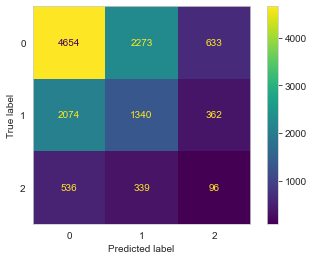

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      7560
           1       0.34      0.35      0.35      3776
           2       0.09      0.10      0.09       971

    accuracy                           0.49     12307
   macro avg       0.36      0.36      0.36     12307
weighted avg       0.50      0.49      0.50     12307



In [77]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 100) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('----------------------------------')
print('ROC-AUC Score ovr: ', metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr', average='macro'))
print('Accuracy score  : ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
plot_confusion_matrix(y_test, y_pred, model)
print(classification_report(y_test, y_pred))

### 4.b) Random Forest Classifier

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.8s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done  70 out of  70 | elapsed:    0.0s finished


----------------------------------
ROC-AUC Score ovr:  0.6435260894846607
Accuracy score  :  0.6269602665149915
Confusion Matrix:



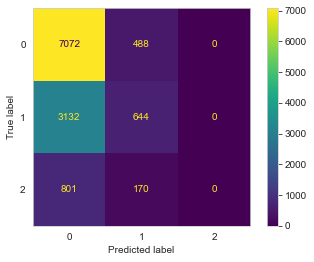

              precision    recall  f1-score   support

           0       0.64      0.94      0.76      7560
           1       0.49      0.17      0.25      3776
           2       0.00      0.00      0.00       971

    accuracy                           0.63     12307
   macro avg       0.38      0.37      0.34     12307
weighted avg       0.55      0.63      0.55     12307



d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
# {'n_estimators': 200,
#  'min_samples_split': 10,
#  'min_samples_leaf': 2,
#  'max_features': 'sqrt',
#  'max_depth': 10,
#  'criterion': 'gini',
#  'bootstrap': False}
model = RandomForestClassifier(verbose = 1, n_jobs = -1,n_estimators= 70,min_samples_split= 20,min_samples_leaf= 5,
                             max_features='sqrt',max_depth= 100,criterion= 'gini',bootstrap= True) 
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('----------------------------------')
print('ROC-AUC Score ovr: ', metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr', average='macro'))
print('Accuracy score  : ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
plot_confusion_matrix(y_test, y_pred, model)
print(classification_report(y_test, y_pred))

### 4.e) Logistic Regression

----------------------------------
ROC-AUC Score ovr:  0.6089953027836962
Accuracy score  :  0.618428536605184
Confusion Matrix:



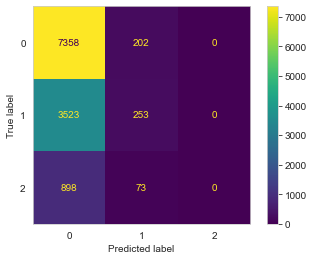

              precision    recall  f1-score   support

           0       0.62      0.97      0.76      7560
           1       0.48      0.07      0.12      3776
           2       0.00      0.00      0.00       971

    accuracy                           0.62     12307
   macro avg       0.37      0.35      0.29     12307
weighted avg       0.53      0.62      0.50     12307



d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
model = LogisticRegression(fit_intercept=True, penalty='l2', solver = 'newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('----------------------------------')
print('ROC-AUC Score ovr: ', metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr', average='macro'))
print('Accuracy score  : ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
plot_confusion_matrix(y_test, y_pred, model)
print(classification_report(y_test, y_pred))

## 5) Hyper-parameter tuning

### 5.a) Decision Tree


In [84]:
DT_grid = {'criterion' : criterion,
              'max_depth' : max_depth}
DT = DecisionTreeClassifier()
DT_best = RandomizedGridSearch(DT, DT_grid, scoring='roc_auc', n_jobs=-1, cv = 5)
DT_best.fit(X_train, y_train)

NameError: name 'criterion' is not defined

In [ ]:
DT_best.best_params_, DT_best.best_score_

In [ ]:
model = DT_best.best_estimator_
# model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('\nRandom Forest best Performance:')
print('----------------------------------')
print('ROC-AUC Score ovr: ', metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr', average='macro'))
print('Accuracy score  : ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
plot_confusion_matrix(y_test, y_pred, model)
print(classification_report(y_test, y_pred))

### 5.b) Random forest

In [85]:
RF_grid = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, None],
              'criterion' : ['gini', 'entropy'],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [5, 10, 15],
             'n_estimators': [10, 20,30, 40, 50, 70, 90, 100, 120, 140, 160, 180 ,200]}

In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = RF_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = 'f1_micro')
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [10, 20, 30, 40, 50, 70,
                                                         90, 100, 120, 140, 160,
                                                         180, 200]},
                   random_state=42, scoring='f1_micro', verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'criterion': 'gini',
 'bootstrap': False}

In [92]:
rf_random.best_score_

0.6181379529309745


Random Forest best Performance:
----------------------------------
ROC-AUC Score ovr:  0.6045814998930218
Accuracy score  :  0.617214778725132
Confusion Matrix:



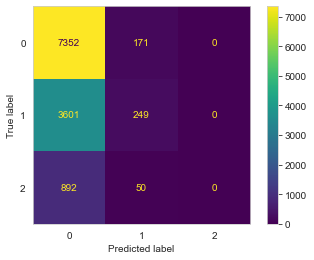

              precision    recall  f1-score   support

           0       0.62      0.98      0.76      7523
           1       0.53      0.06      0.12      3850
           2       0.00      0.00      0.00       942

    accuracy                           0.62     12315
   macro avg       0.38      0.35      0.29     12315
weighted avg       0.54      0.62      0.50     12315



d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\hdd\lab04_rev\venv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
model = rf_random.best_estimator_
# model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('\nRandom Forest best Performance:')
print('----------------------------------')
print('ROC-AUC Score ovr: ', metrics.roc_auc_score(y_test, model.predict_proba(X_test), multi_class = 'ovr', average='macro'))
print('Accuracy score  : ', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n')
plot_confusion_matrix(y_test, y_pred, model)
print(classification_report(y_test, y_pred))

In [94]:
best_rf = rf_random.best_estimator_
evaluate(best_rf, X_test, y_test)

NameError: name 'evaluate' is not defined

### 5.e) logistic Regression

In [ ]:
def make_regression(reg, X_train, y_train, X_val, y_val) :
    reg.fit(X_train , y_train)
    y_pred = reg.predict(X_val)
    print('\nLogistic Regression Initial Performance:')
    print('------------------------')
    print('F1 Score        : ', metrics.f1_score(y_val, y_pred, average='micro'))
    print('Accuracy score  : ', metrics.accuracy_score(y_val, y_pred))
    print('Confusion Matrix:\n')
    plot_confusion_matrix(y_val, y_pred, reg)
    print(classification_report(y_val, y_pred))
    score = -1
    return score


In [ ]:
def train_val (X_train, y_train, X_val, y_val, model ) :
    score = make_regression(model , X_train , y_train ,X_val , y_val)
    return score

In [ ]:
logis_results = {"score" : [] , "N" :[]}
logis = LogisticRegressionCV(class_weight='balanced' , n_jobs=-1) 
score = train_val(X_train, y_train, X_val, y_val, model = logis )
logis_results["score"].append(score)
